# YouTube Trending Video Analyzer

## Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from collections import Counter
import itertools
import re

In [2]:
# Load dataset
df = pd.read_csv("dataset/youtube.csv")

## Basic data inspection

In [3]:
df

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,13/06/2018,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,13/06/2018,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,11/06/2018,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,13/06/2018,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False


In [4]:
df.shape

(161470, 18)

In [5]:
df

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,13/06/2018,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,False,False,False
161466,161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,13/06/2018,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,False,False,False
161467,161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,11/06/2018,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,False,False,False
161468,161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,13/06/2018,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,False,False,False


## Clean the datset

In [6]:
# 1. Convert dates to datetime
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\3154045949.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\3154045949.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')


In [7]:
# 2. Force the datatype to boolean
df['comments_disabled'] = df['comments_disabled'].astype(bool)
df['ratings_disabled'] = df['ratings_disabled'].astype(bool)

In [8]:
# 3. Drop duplicates
df = df.drop_duplicates(subset=['title', 'channel_title'])

In [9]:
# 4. Fill numeric missing values
for col in ['views', 'likes', 'dislikes', 'comment_count']:
    df[col] = df[col].fillna(0)


C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\3143994753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(0)


In [24]:
# 5. Remove non-alphanumeric characters 
df['cleaned_title'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
df['cleaned_tags'] = df['tags'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))

C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\1888334984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_title'] = df['title'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))
C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\1888334984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_tags'] = df['tags'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57053 entries, 0 to 161469
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   57053 non-null  int64         
 1   video_id                57053 non-null  object        
 2   trending_date           21413 non-null  datetime64[ns]
 3   title                   57053 non-null  object        
 4   channel_title           57053 non-null  object        
 5   category_id             57053 non-null  int64         
 6   publish_date            57053 non-null  datetime64[ns]
 7   time_frame              57053 non-null  object        
 8   published_day_of_week   57053 non-null  object        
 9   publish_country         57053 non-null  object        
 10  tags                    57053 non-null  object        
 11  views                   57053 non-null  int64         
 12  likes                   57053 non-null  int64     

## Exploratory Data Analysis of the datset

### Looking at the basic statistics

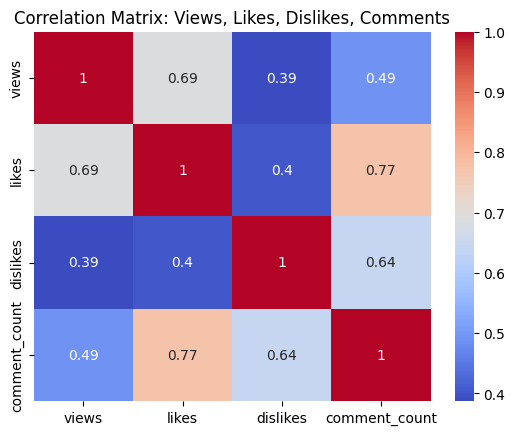

In [11]:
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Views, Likes, Dislikes, Comments")
plt.show()

### Top channels by number of trending videos

C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\1940095092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")


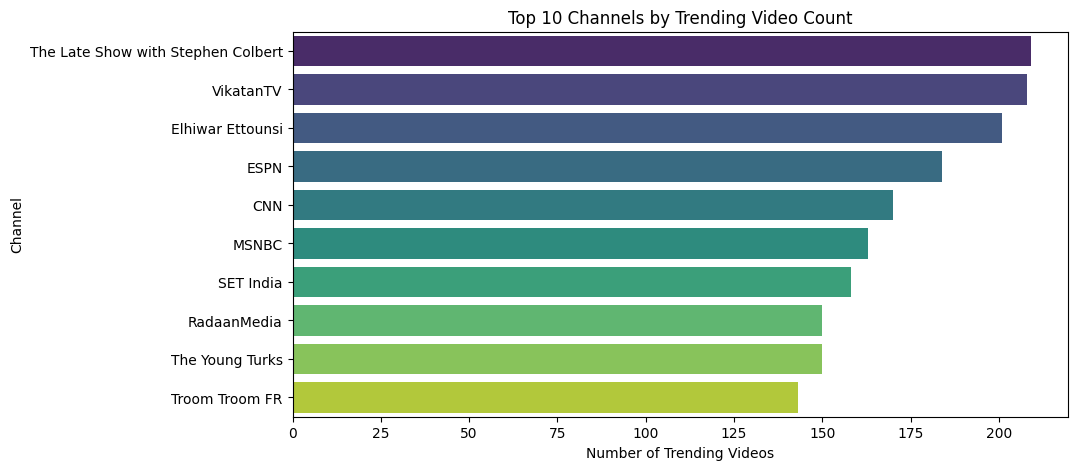

In [12]:
top_channels = df['channel_title'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_channels.values, y=top_channels.index, palette="viridis")
plt.title("Top 10 Channels by Trending Video Count")
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel")
plt.show()

### Average views by country

In [14]:
df["publish_country"].nunique()

4

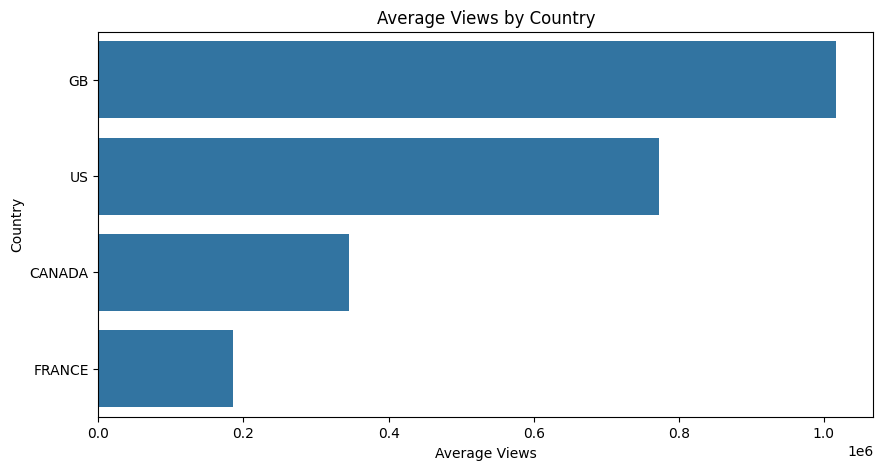

In [15]:
country_views = df.groupby('publish_country')['views'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=country_views.values, y=country_views.index)
plt.title("Average Views by Country")
plt.xlabel("Average Views")
plt.ylabel("Country")
plt.show()

## Sentiment Analysis

Let us have a look at the word distribution of the most common words 

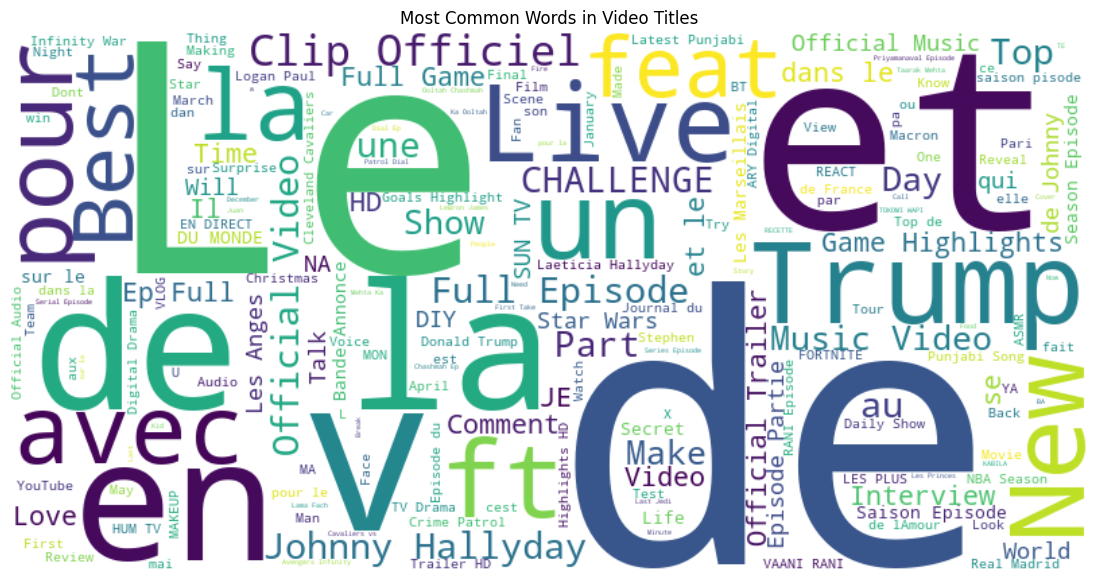

In [21]:
text = " ".join(df['cleaned_title'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Video Titles")
plt.show()


Seems like alot of French words are popular in this dataset

## Title length vs. views

C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\3728124063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title_length'] = df['title'].astype(str).apply(len)


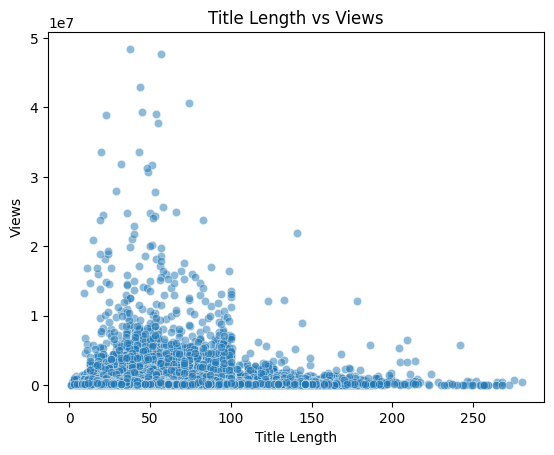

In [22]:
df['title_length'] = df['title'].astype(str).apply(len)
sns.scatterplot(x='title_length', y='views', data=df, alpha=0.5)
plt.title("Title Length vs Views")
plt.xlabel("Title Length")
plt.ylabel("Views")
plt.show()

## Most common tags

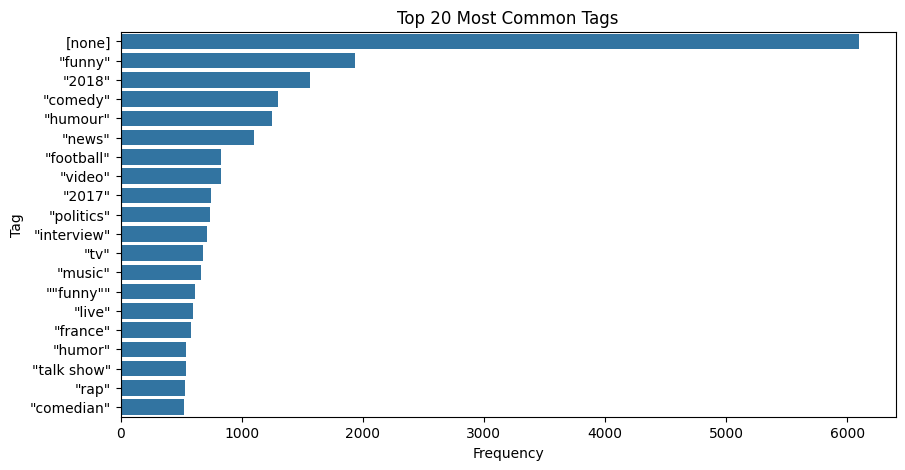

In [31]:

all_tags = df['tags'].dropna().apply(lambda x: x.split('|'))
flat_tags = list(itertools.chain.from_iterable(all_tags))
tag_counts = Counter(flat_tags)
top_tags = dict(tag_counts.most_common(20))

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_tags.values()), y=list(top_tags.keys()))
plt.title("Top 20 Most Common Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()

## Publish Timing & Engagement

Here lets try to get some answers to a few questions

### Q1) Which day of week performs best?

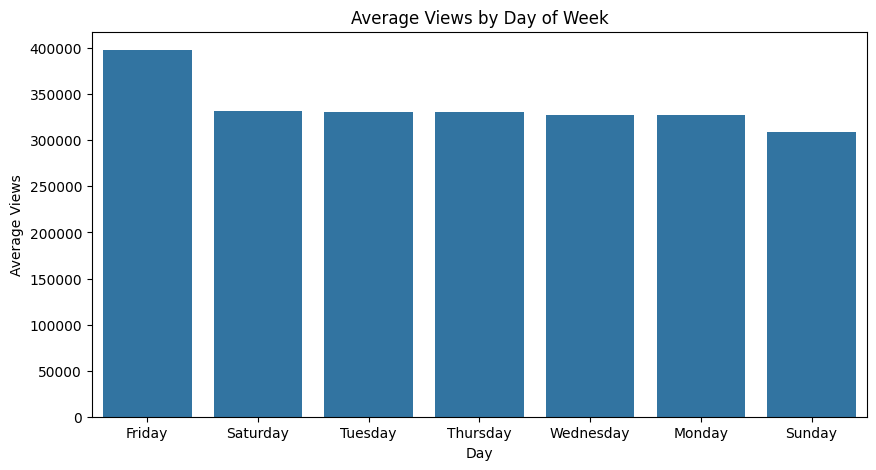

In [ ]:
day_views = df.groupby('published_day_of_week')['views'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=day_views.index, y=day_views.values)
plt.title("Average Views by Day of Week")
plt.xlabel("Day")
plt.ylabel("Average Views")
plt.show()


### Q2) How long do videos stay trending?

C:\Users\Goutham\AppData\Local\Temp\ipykernel_17344\2252039763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_frame'] = df['time_frame'].astype(str)


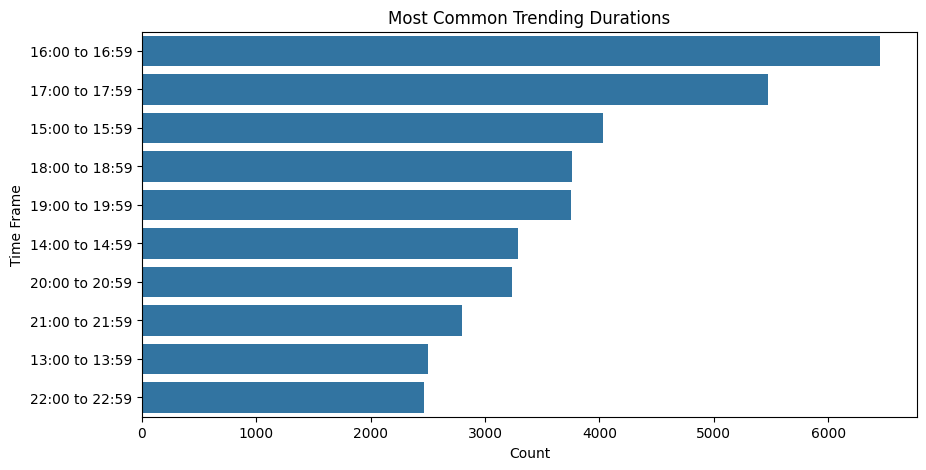

In [34]:
df['time_frame'] = df['time_frame'].astype(str)
tf_counts = df['time_frame'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=tf_counts.values, y=tf_counts.index)
plt.title("Most Common Trending Durations")
plt.xlabel("Count")
plt.ylabel("Time Frame")
plt.show()


### Q3) What drives views?

For this question, let's build a linear regression model

In [35]:
### Linear Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Dataset splitting

In [36]:
features = ['likes', 'dislikes', 'comment_count', 'title_length']
X = df[features]
y = np.log1p(df['views'])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [39]:
model = LinearRegression()
model.fit(X_train_s, y_train)

LinearRegression()

In [40]:
print("Model R^2 Score:", model.score(X_test_s, y_test))
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

Model R^2 Score: 0.13165036222913973
         Feature  Coefficient
0          likes     0.717933
1       dislikes     0.116167
3   title_length     0.104498
2  comment_count    -0.150567


Let's do a more complex model like XGboost

In [53]:
### XGBoost Libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error

Dataset same as before

In [42]:
features = ['likes', 'dislikes', 'comment_count', 'title_length']
X = df[features]
y = np.log1p(df['views'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.7157139157275112


In [48]:
r2 = model.score(X_test, y_test)
print("R^2 score:", r2)

R^2 score: 0.8339554489403221


### Model Analysis

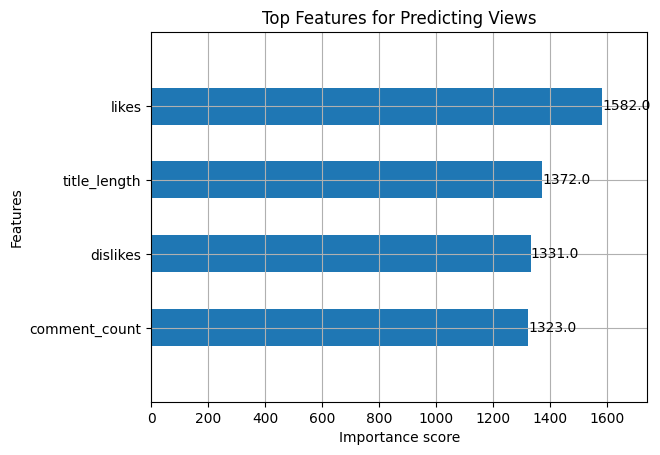

In [49]:
# Feature importance plot
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.5)
plt.title("Top Features for Predicting Views")
plt.show()

Let us make this model even better by doing hyperparameter tuning

### Hyperparameter tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [52]:
# Hyperparameters search space
param_dist = {
    'max_depth': [3, 6, 9],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': [100, 200, 300]
}

# XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Randomized search
random_search = RandomizedSearchCV(xgb_model, param_dist, n_iter=50, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'learning_rate': 0.03206320000841224, 'max_depth': 6, 'n_estimators': 300}


In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [54]:
# Calculate RMSE and MAE and R^2
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = model.score(X_test, y_test)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2 score: {r2:.2f}")

RMSE: 0.72
MAE: 0.54
R^2 score: 0.83


Let us use this XGboost model 